In [ ]:
import xarray  as xr
import pandas  as pd
import numpy   as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates  as mdates
#import matplotlib.ticker as ticker  
import cartopy.crs       as ccrs
import cartopy.feature   as cfeature
import xgcm 
from   datetime import date

directory = "data/"

In [15]:
average = xr.open_dataset(directory+"croco_avg.nc")
average

<xarray.Dataset> Size: 216MB
Dimensions:     (xi_rho: 43, xi_u: 42, eta_rho: 44, eta_v: 43, s_rho: 32,
                 s_w: 33, time: 119, auxil: 4)
Coordinates: (12/13)
  * xi_rho      (xi_rho) float32 172B 1.0 2.0 3.0 4.0 ... 40.0 41.0 42.0 43.0
  * xi_u        (xi_u) float32 168B 1.5 2.5 3.5 4.5 5.5 ... 39.5 40.5 41.5 42.5
  * eta_rho     (eta_rho) float32 176B 1.0 2.0 3.0 4.0 ... 41.0 42.0 43.0 44.0
  * eta_v       (eta_v) float32 172B 1.5 2.5 3.5 4.5 5.5 ... 40.5 41.5 42.5 43.5
  * s_rho       (s_rho) float32 128B -0.9844 -0.9531 ... -0.04688 -0.01562
  * s_w         (s_w) float32 132B -1.0 -0.9688 -0.9375 ... -0.0625 -0.03125 0.0
    ...          ...
    lat_rho     (eta_rho, xi_rho) float32 8kB ...
    lon_u       (eta_rho, xi_u) float32 7kB ...
    lat_u       (eta_rho, xi_u) float32 7kB ...
    lon_v       (eta_v, xi_rho) float32 7kB ...
    lat_v       (eta_v, xi_rho) float32 7kB ...
  * time        (time) float64 952B 1.314e+05 3.906e+05 ... 3.046e+07 3.072e+07
Dimensions without coordinates: auxil
Data variables: (12/37)
    spherical   |S1 1B ...
    xl          float32 4B ...
    el          float32 4B ...
    Vtransform  float32 4B ...
    Cs_rho      (s_rho) float32 128B ...
    Cs_w        (s_w) float32 132B ...
    ...          ...
    shflux      (time, eta_rho, xi_rho) float32 901kB ...
    swflux      (time, eta_rho, xi_rho) float32 901kB ...
    radsw       (time, eta_rho, xi_rho) float32 901kB ...
    shflx_rlw   (time, eta_rho, xi_rho) float32 901kB ...
    shflx_lat   (time, eta_rho, xi_rho) float32 901kB ...
    shflx_sen   (time, eta_rho, xi_rho) float32 901kB ...
Attributes: (12/55)
    type:           CROCO averages file
    title:          BENGUELA TEST MODEL
    date:           
    rst_file:       outputs/croco_rst.nc
    his_file:       outputs/croco_his.nc
    avg_file:       outputs/croco_avg.nc
    ...             ...
    rho0_expl:      Mean density used in Boussinesq approximation
    rho0_units:     kilogram meter-3
    gamma2:         1.0
    gamma2_expl:    Slipperiness parameter
    SRCS:           main.F step.F read_inp.F timers_roms.F init_scalars.F ini...
    CPP-options:    REGIONAL BENGUELA_LR OBC_EAST OBC_WEST OBC_NORTH OBC_SOUT...

In [12]:
history = xr.open_dataset(directory+"croco_his.nc")
history

<xarray.Dataset> Size: 188MB
Dimensions:     (xi_rho: 43, xi_u: 42, eta_rho: 44, eta_v: 43, s_rho: 32,
                 s_w: 33, time: 120, auxil: 4)
Coordinates: (12/13)
  * xi_rho      (xi_rho) float32 172B 1.0 2.0 3.0 4.0 ... 40.0 41.0 42.0 43.0
  * xi_u        (xi_u) float32 168B 1.5 2.5 3.5 4.5 5.5 ... 39.5 40.5 41.5 42.5
  * eta_rho     (eta_rho) float32 176B 1.0 2.0 3.0 4.0 ... 41.0 42.0 43.0 44.0
  * eta_v       (eta_v) float32 172B 1.5 2.5 3.5 4.5 5.5 ... 40.5 41.5 42.5 43.5
  * s_rho       (s_rho) float32 128B -0.9844 -0.9531 ... -0.04688 -0.01562
  * s_w         (s_w) float32 132B -1.0 -0.9688 -0.9375 ... -0.0625 -0.03125 0.0
    ...          ...
    lat_rho     (eta_rho, xi_rho) float32 8kB ...
    lon_u       (eta_rho, xi_u) float32 7kB ...
    lat_u       (eta_rho, xi_u) float32 7kB ...
    lon_v       (eta_v, xi_rho) float32 7kB ...
    lat_v       (eta_v, xi_rho) float32 7kB ...
  * time        (time) float64 960B 0.0 2.592e+05 ... 3.059e+07 3.084e+07
Dimensions without coordinates: auxil
Data variables: (12/36)
    spherical   |S1 1B ...
    xl          float32 4B ...
    el          float32 4B ...
    Vtransform  float32 4B ...
    Cs_rho      (s_rho) float32 128B ...
    Cs_w        (s_w) float32 132B ...
    ...          ...
    shflux      (time, eta_rho, xi_rho) float32 908kB ...
    swflux      (time, eta_rho, xi_rho) float32 908kB ...
    radsw       (time, eta_rho, xi_rho) float32 908kB ...
    shflx_rlw   (time, eta_rho, xi_rho) float32 908kB ...
    shflx_lat   (time, eta_rho, xi_rho) float32 908kB ...
    shflx_sen   (time, eta_rho, xi_rho) float32 908kB ...
Attributes: (12/55)
    type:           CROCO history file
    title:          BENGUELA TEST MODEL
    date:           
    rst_file:       outputs/croco_rst.nc
    his_file:       outputs/croco_his.nc
    avg_file:       outputs/croco_avg.nc
    ...             ...
    rho0_expl:      Mean density used in Boussinesq approximation
    rho0_units:     kilogram meter-3
    gamma2:         1.0
    gamma2_expl:    Slipperiness parameter
    SRCS:           main.F step.F read_inp.F timers_roms.F init_scalars.F ini...
    CPP-options:    REGIONAL BENGUELA_LR OBC_EAST OBC_WEST OBC_NORTH OBC_SOUT...

In [10]:
grid = xr.open_dataset('data/croco_grd.nc')
#grid

In [14]:
## "réparer" la variable time
history["time"] = pd.date_range(start="2005-01-01", periods=120, freq="3D")
print(history.time)

<xarray.DataArray 'time' (time: 120)> Size: 960B
array(['2005-01-01T00:00:00.000000000', '2005-01-04T00:00:00.000000000',
       '2005-01-07T00:00:00.000000000', '2005-01-10T00:00:00.000000000',
       '2005-01-13T00:00:00.000000000', '2005-01-16T00:00:00.000000000',
       '2005-01-19T00:00:00.000000000', '2005-01-22T00:00:00.000000000',
       '2005-01-25T00:00:00.000000000', '2005-01-28T00:00:00.000000000',
       '2005-01-31T00:00:00.000000000', '2005-02-03T00:00:00.000000000',
       '2005-02-06T00:00:00.000000000', '2005-02-09T00:00:00.000000000',
       '2005-02-12T00:00:00.000000000', '2005-02-15T00:00:00.000000000',
       '2005-02-18T00:00:00.000000000', '2005-02-21T00:00:00.000000000',
       '2005-02-24T00:00:00.000000000', '2005-02-27T00:00:00.000000000',
       '2005-03-02T00:00:00.000000000', '2005-03-05T00:00:00.000000000',
       '2005-03-08T00:00:00.000000000', '2005-03-11T00:00:00.000000000',
       '2005-03-14T00:00:00.000000000', '2005-03-17T00:00:00.000000000',
  

In [16]:
# la même chose pour l'autre jeu de données
average["time"] = pd.date_range(start="2005-01-02", periods=119, freq="3D")
print(average.time)

<xarray.DataArray 'time' (time: 119)> Size: 952B
array(['2005-01-02T00:00:00.000000000', '2005-01-05T00:00:00.000000000',
       '2005-01-08T00:00:00.000000000', '2005-01-11T00:00:00.000000000',
       '2005-01-14T00:00:00.000000000', '2005-01-17T00:00:00.000000000',
       '2005-01-20T00:00:00.000000000', '2005-01-23T00:00:00.000000000',
       '2005-01-26T00:00:00.000000000', '2005-01-29T00:00:00.000000000',
       '2005-02-01T00:00:00.000000000', '2005-02-04T00:00:00.000000000',
       '2005-02-07T00:00:00.000000000', '2005-02-10T00:00:00.000000000',
       '2005-02-13T00:00:00.000000000', '2005-02-16T00:00:00.000000000',
       '2005-02-19T00:00:00.000000000', '2005-02-22T00:00:00.000000000',
       '2005-02-25T00:00:00.000000000', '2005-02-28T00:00:00.000000000',
       '2005-03-03T00:00:00.000000000', '2005-03-06T00:00:00.000000000',
       '2005-03-09T00:00:00.000000000', '2005-03-12T00:00:00.000000000',
       '2005-03-15T00:00:00.000000000', '2005-03-18T00:00:00.000000000',
  

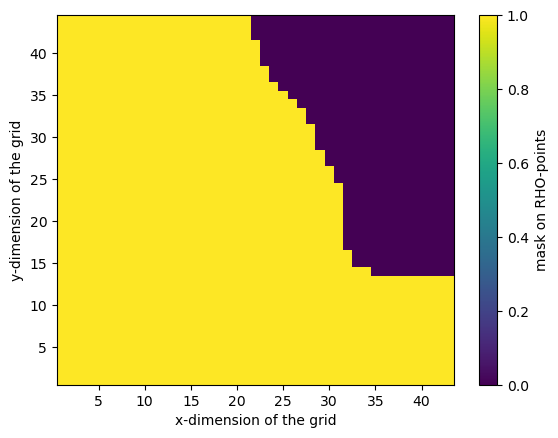

In [17]:
#afficher le mask
history.mask_rho.plot()

## les sections suivantes sont à adapter en fonction de vos données

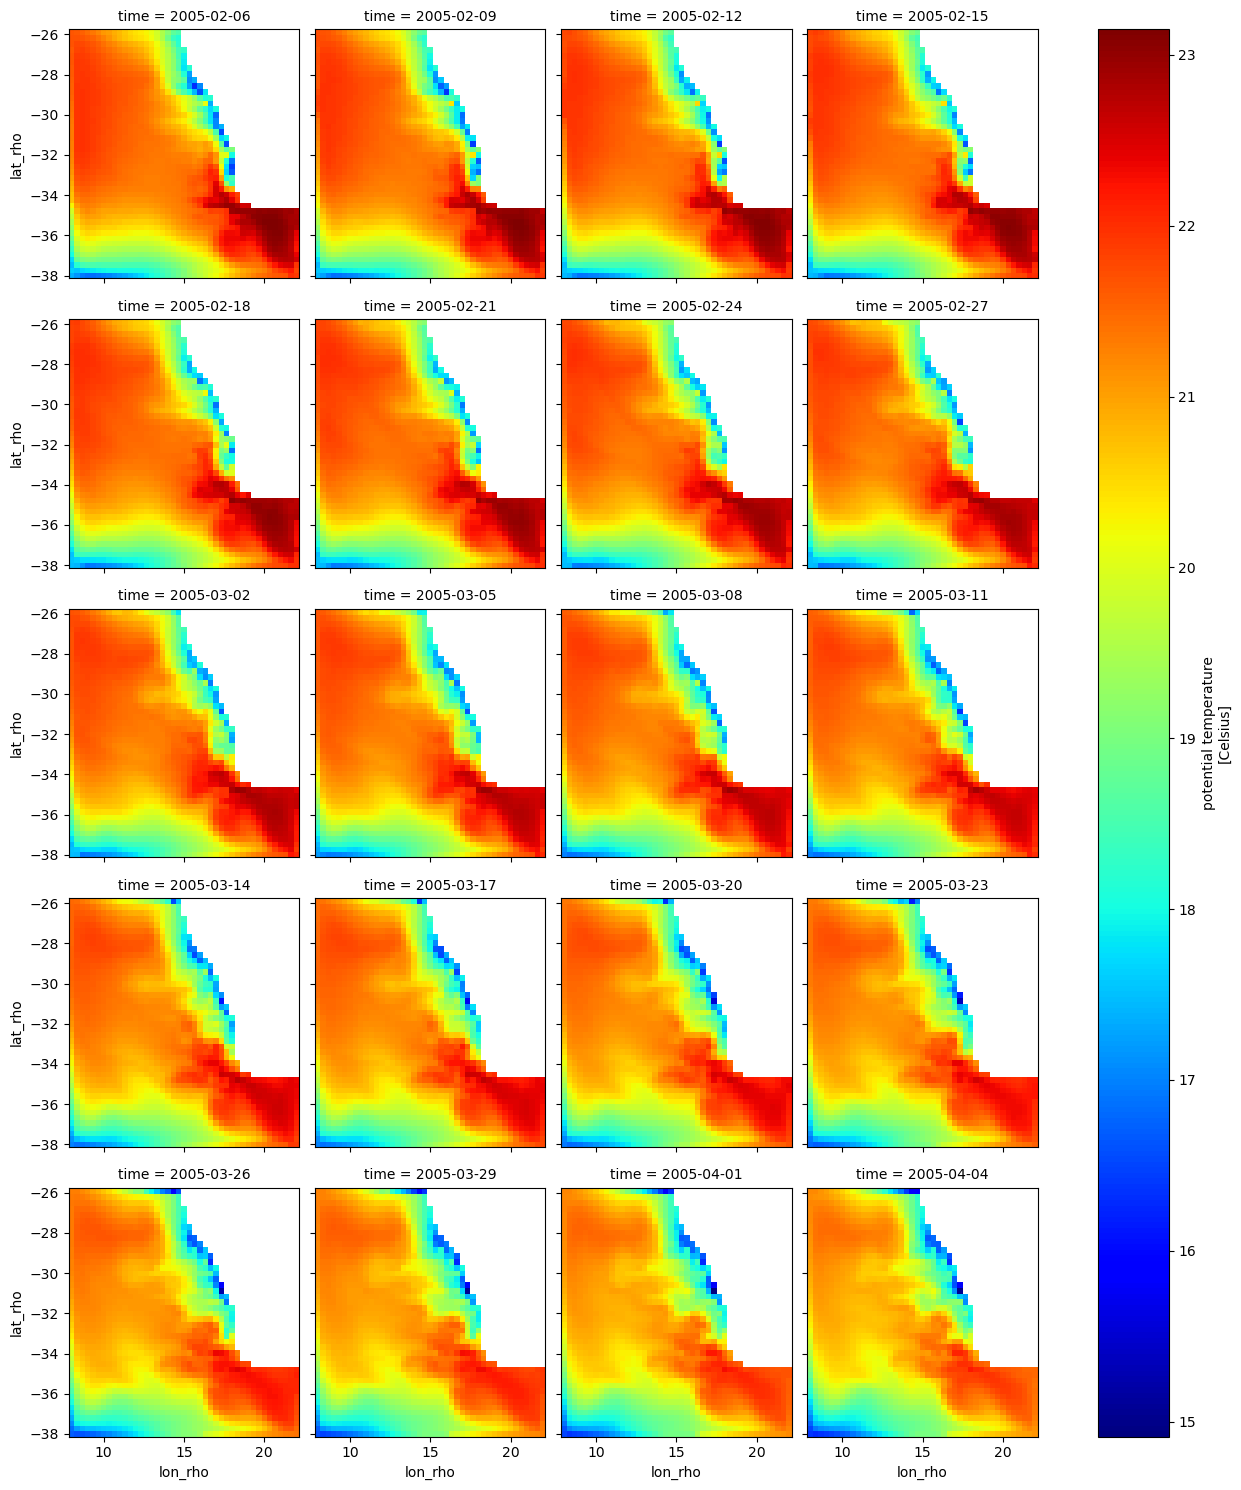

In [20]:
#premiere visualisation
history.temp.isel(time=[int(x) for x in np.arange(12,32)]).where(average.mask_rho!=0).isel(s_rho=-1)\
    .plot(x='lon_rho',y='lat_rho',col='time',col_wrap=4,cmap='jet')

## placer u,v sur la grille horizontale de T,S

In [ ]:
# Définir la grille
grid = xgcm.Grid(history)

# Interpolation automatique
sustr_rho = grid.interp(history.sustr, 'X')
svstr_rho = grid.interp(history.svstr, 'Y')

#ajouter les variables interpolées dans le dataframe
history['sustr_rho'] = sustr_rho
history['svstr_rho'] = svstr_rho
history['str_mod_rho'] = np.sqrt( (sustr_rho**2) + (svstr_rho**2) ) 

#history

Text(0.5, 0.98, 'Stress du vent')

<Figure size 640x480 with 0 Axes>

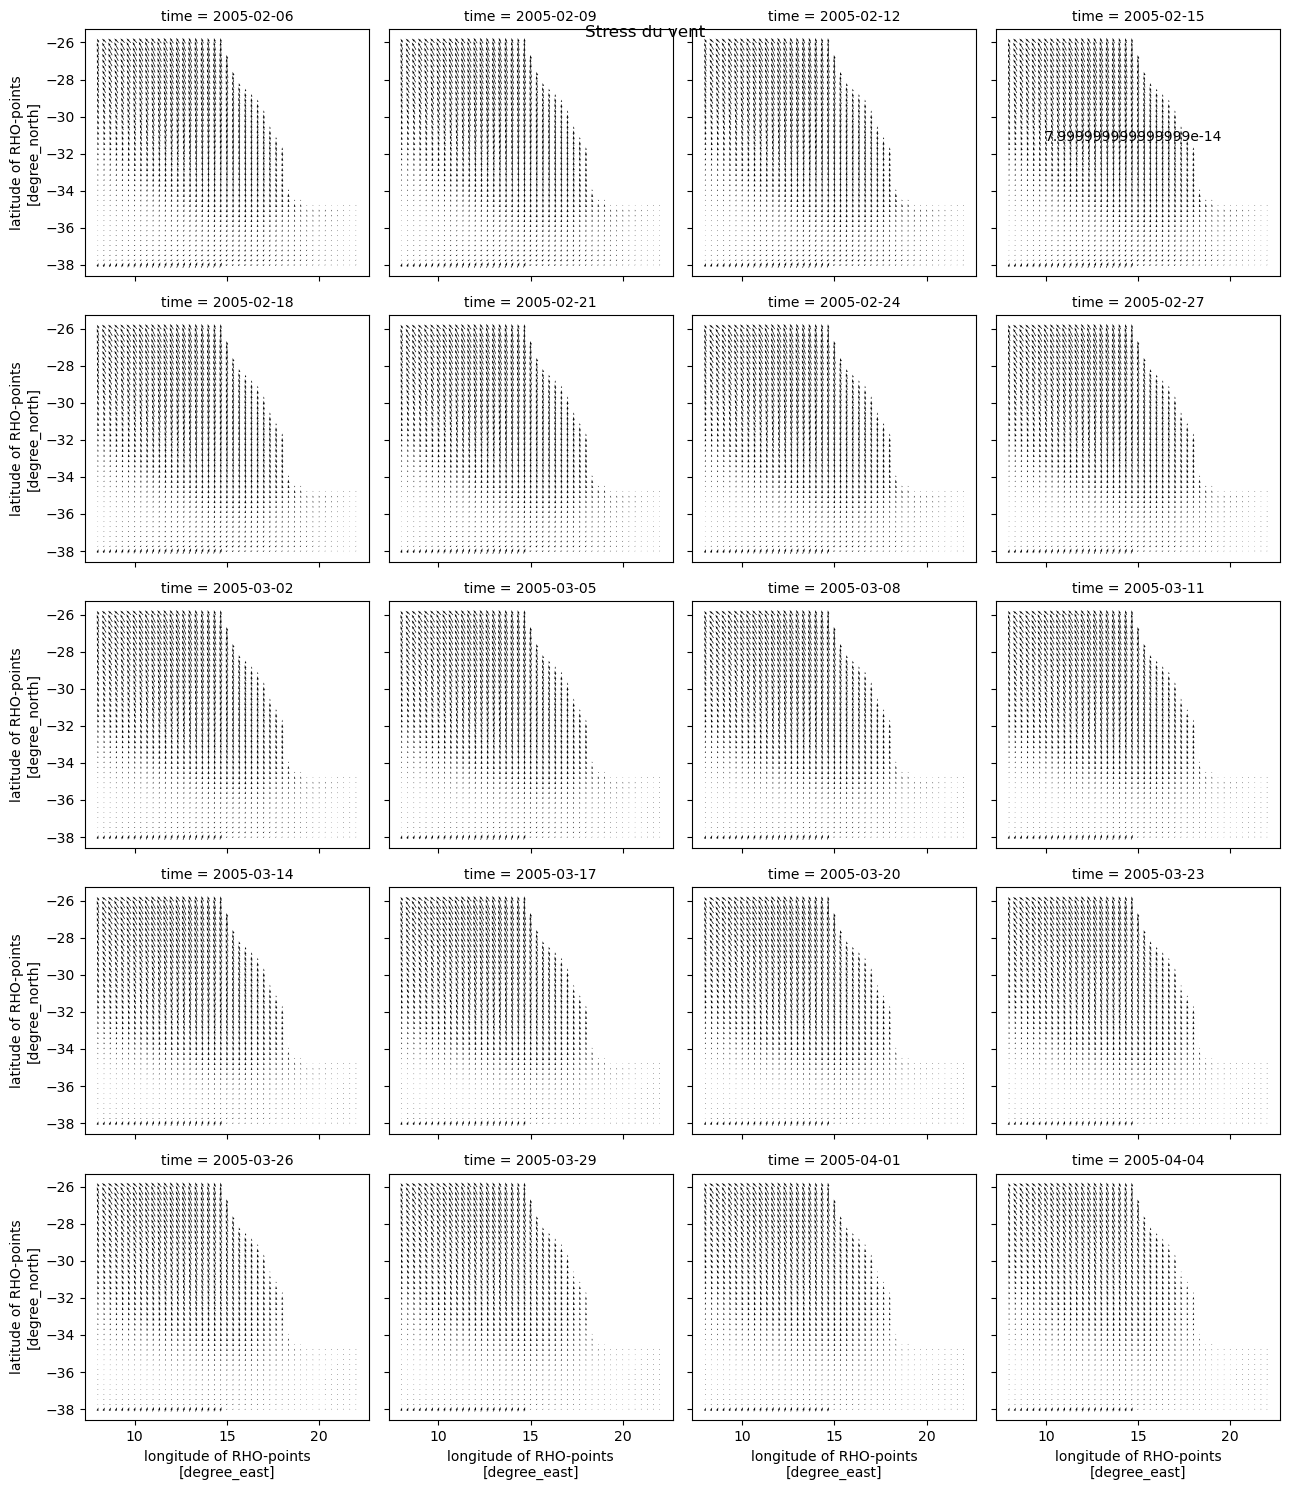

In [23]:
# visualiser le Stress du vent
fig = plt.figure()
history.isel(s_rho=-1).where(average.mask_rho!=0).isel(time=[int(x) for x in np.arange(12,32)])\
    .plot.quiver(x='lon_rho', y='lat_rho',u='sustr_rho',v='svstr_rho',col='time',col_wrap=4,scale=3)
plt.suptitle('Stress du vent')

Text(0.5, 1.0, 'Module du Stress du vent')

<Figure size 640x480 with 0 Axes>

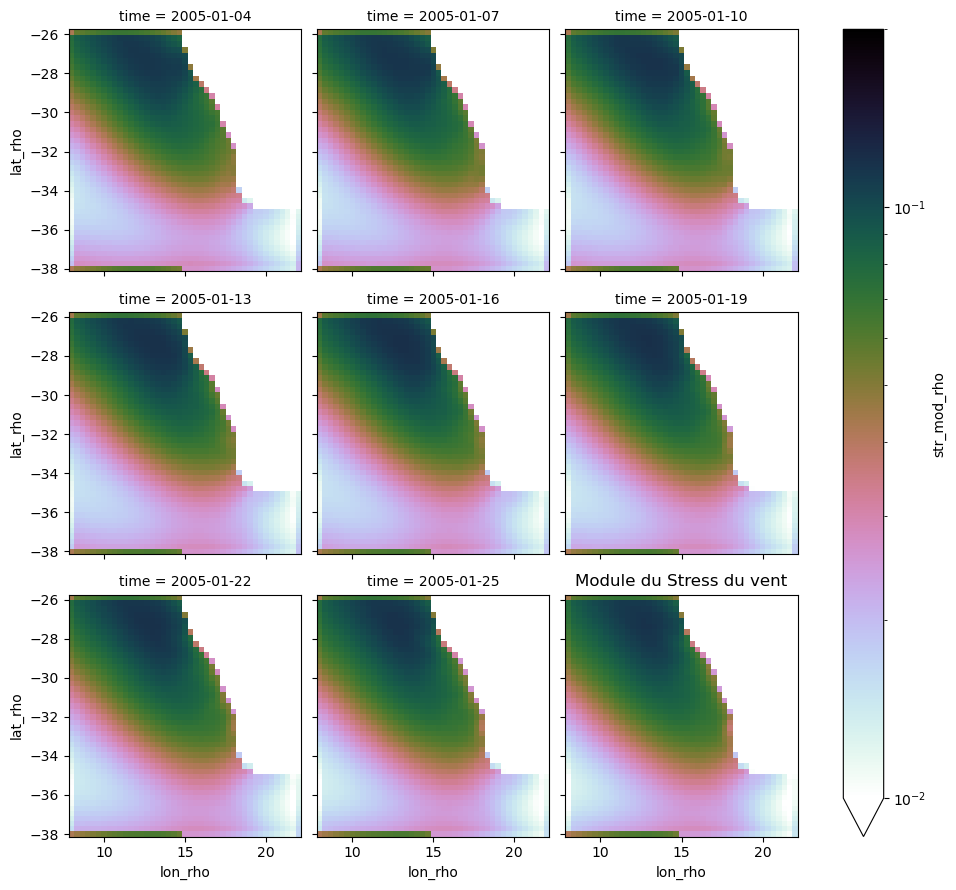

In [ ]:
# module du stress du vent
fig = plt.figure()
history.str_mod_rho.where(average.mask_rho!=0).isel(time=[int(x) for x in np.arange(1,10)])\
    .plot(x='lon_rho',y='lat_rho',col='time',col_wrap=3,cmap='cubehelix_r', vmin=1e-2, vmax=.2, norm=mcolors.LogNorm())
plt.title('Module du Stress du vent')

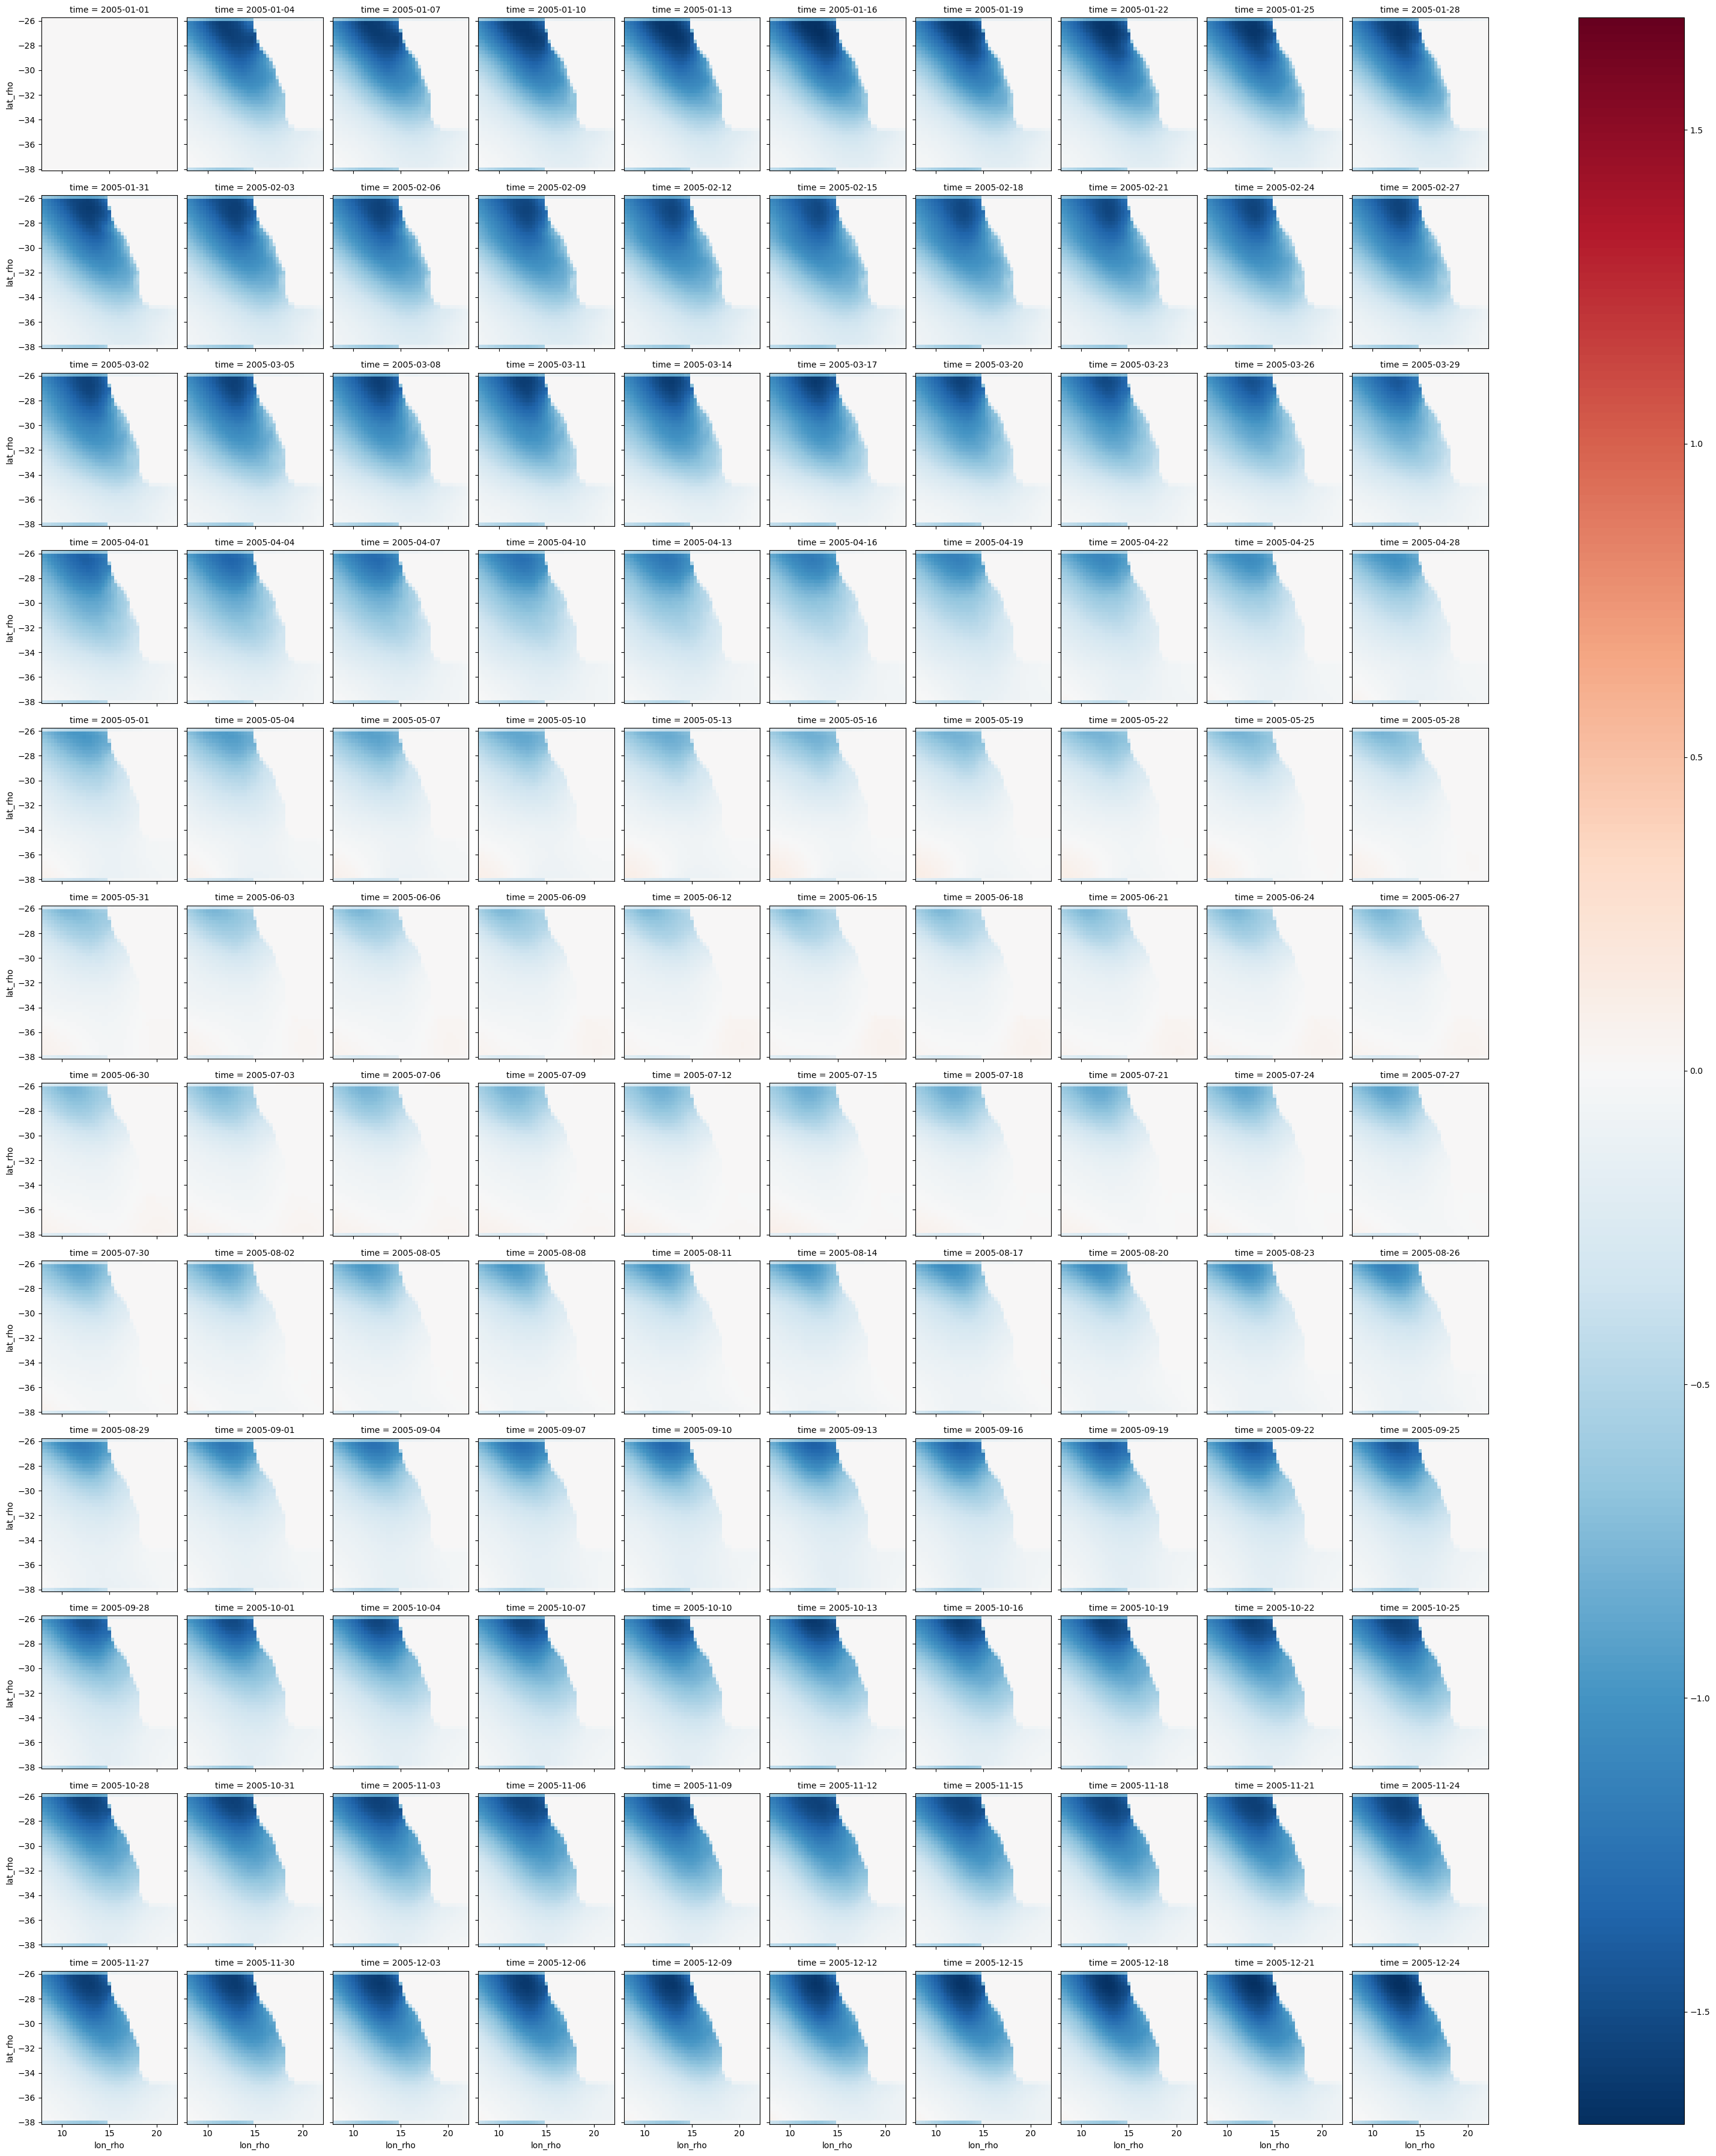

In [ ]:
# extraire le stress de vent zonal (tau_x) et la latitude
tau_y = history.svstr_rho   # N/m²
lat = history.lat_rho    # degrés

# Paramètres constants
rho = 1025  # densité de l’eau (kg/m³)
Omega = 7.2921e-5  # vitesse de rotation de la Terre (rad/s)

# Calcul du paramètre de Coriolis f
f = 2 * Omega * np.sin(np.deg2rad(lat))

# Calcul de l’indice d’upwelling (UI)
UI = tau_y / (rho * f)
#UI.isel(time=[int(x) for x in np.arange(1,10)]).plot(x='lon_rho',y='lat_rho',col='time',col_wrap=10)
UI.plot(x='lon_rho',y='lat_rho',col='time',col_wrap=10)


# Ajouter UI comme nouvelle variable au dataset
#ds["UI"] = UI

# # Sauvegarder dans un nouveau fichier
# ds.to_netcdf("croco_upwelling_index.nc")

In [ ]:

directory = "../sst_data/"
file = "climatology_sst_gg_1981_2024.nc"

data = xr.open_dataset(directory+file)
sst = data.analysed_sst
lon = data.lon
lat = data.lat

month = data.time.dt.strftime('%B').values
#[date(2024, int(m), 1).strftime("%B") for m in range(1, 12.1)] 

# figure
fig, axes = plt.subplots(nrows=4, ncols=3, tight_layout=True, figsize=(6, 7), dpi=300,
                         sharex=True, sharey=True, subplot_kw={'projection': ccrs.PlateCarree()})
vmin = 22
vmax = 30

for i in range(4):
    for j in range(3):
        temp  = sst[i * 3 + j ,:,:] 
        month_name = month[i * 3 + j]
        ax = axes[i, j]
        im = ax.pcolormesh(lon, lat, temp, 
                           transform=ccrs.PlateCarree(), cmap='jet',
                           vmin=vmin, vmax=vmax)
        ax.set_title('$'+month_name+'$',fontsize=10)
        ax.set_xlabel("",fontsize=6)
        ax.set_ylabel("",fontsize=6)
        ax.set_extent([-7, 14, -6, 8.5])
        
        gl = ax.gridlines(draw_labels=True, linewidth=.08,color='k')
        gl.top_labels = False
        gl.right_labels = False
        gl.xlabel_style = {'fontsize': 7}
        gl.ylabel_style = {'fontsize': 7}
        
for ax in axes.flat:
    ax.add_feature(cfeature.COASTLINE, edgecolor='k')
    ax.add_feature(cfeature.LAND, color=[0.8, 0.8, 0.82])
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(cfeature.LAKES)
    ax.add_feature(cfeature.BORDERS,color='k')

plt.suptitle('SST Climatology [1981-2024], Gulf of Guinea ',fontsize=14)

cbar_ax = fig.add_axes([0.1, -0.045, 0.8, 0.02]) 
cbar = plt.colorbar(im, cax=cbar_ax, orientation='horizontal')

cbar.ax.set_title('$T$ $($°$C)$',fontsize=9)
cbar.ax.tick_params(axis='x', labelsize=10)  

plt.savefig(directory+'clim_sst_GG.png', dpi=fig.dpi, bbox_inches='tight')

plt.show()


/home/fernand/anaconda3/lib/python3.12/site-packages/xarray/coding/times.py:358: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)
/tmp/ipykernel_79958/3637896924.py:6: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates prior reform date (1582-10-15). To silence this warning specify 'use_cftime=True'.
  data = xr.open_dataset(directory+file)
/home/fernand/anaconda3/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


NameError: name 'repertoire' is not defined

/home/fernand/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/fernand/anaconda3/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


/home/fernand/anaconda3/lib/python3.12/site-packages/xarray/coding/times.py:358: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)
/tmp/ipykernel_79958/773000595.py:9: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates prior reform date (1582-10-15). To silence this warning specify 'use_cftime=True'.
  netc = xr.open_dataset(directory+file_m, decode_times=True)
/home/fernand/anaconda3/lib/python3.12/site-packages/xarray/coding/times.py:358: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)
/tmp/ipykernel_79958/773000595.py:18: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates prior reform dat

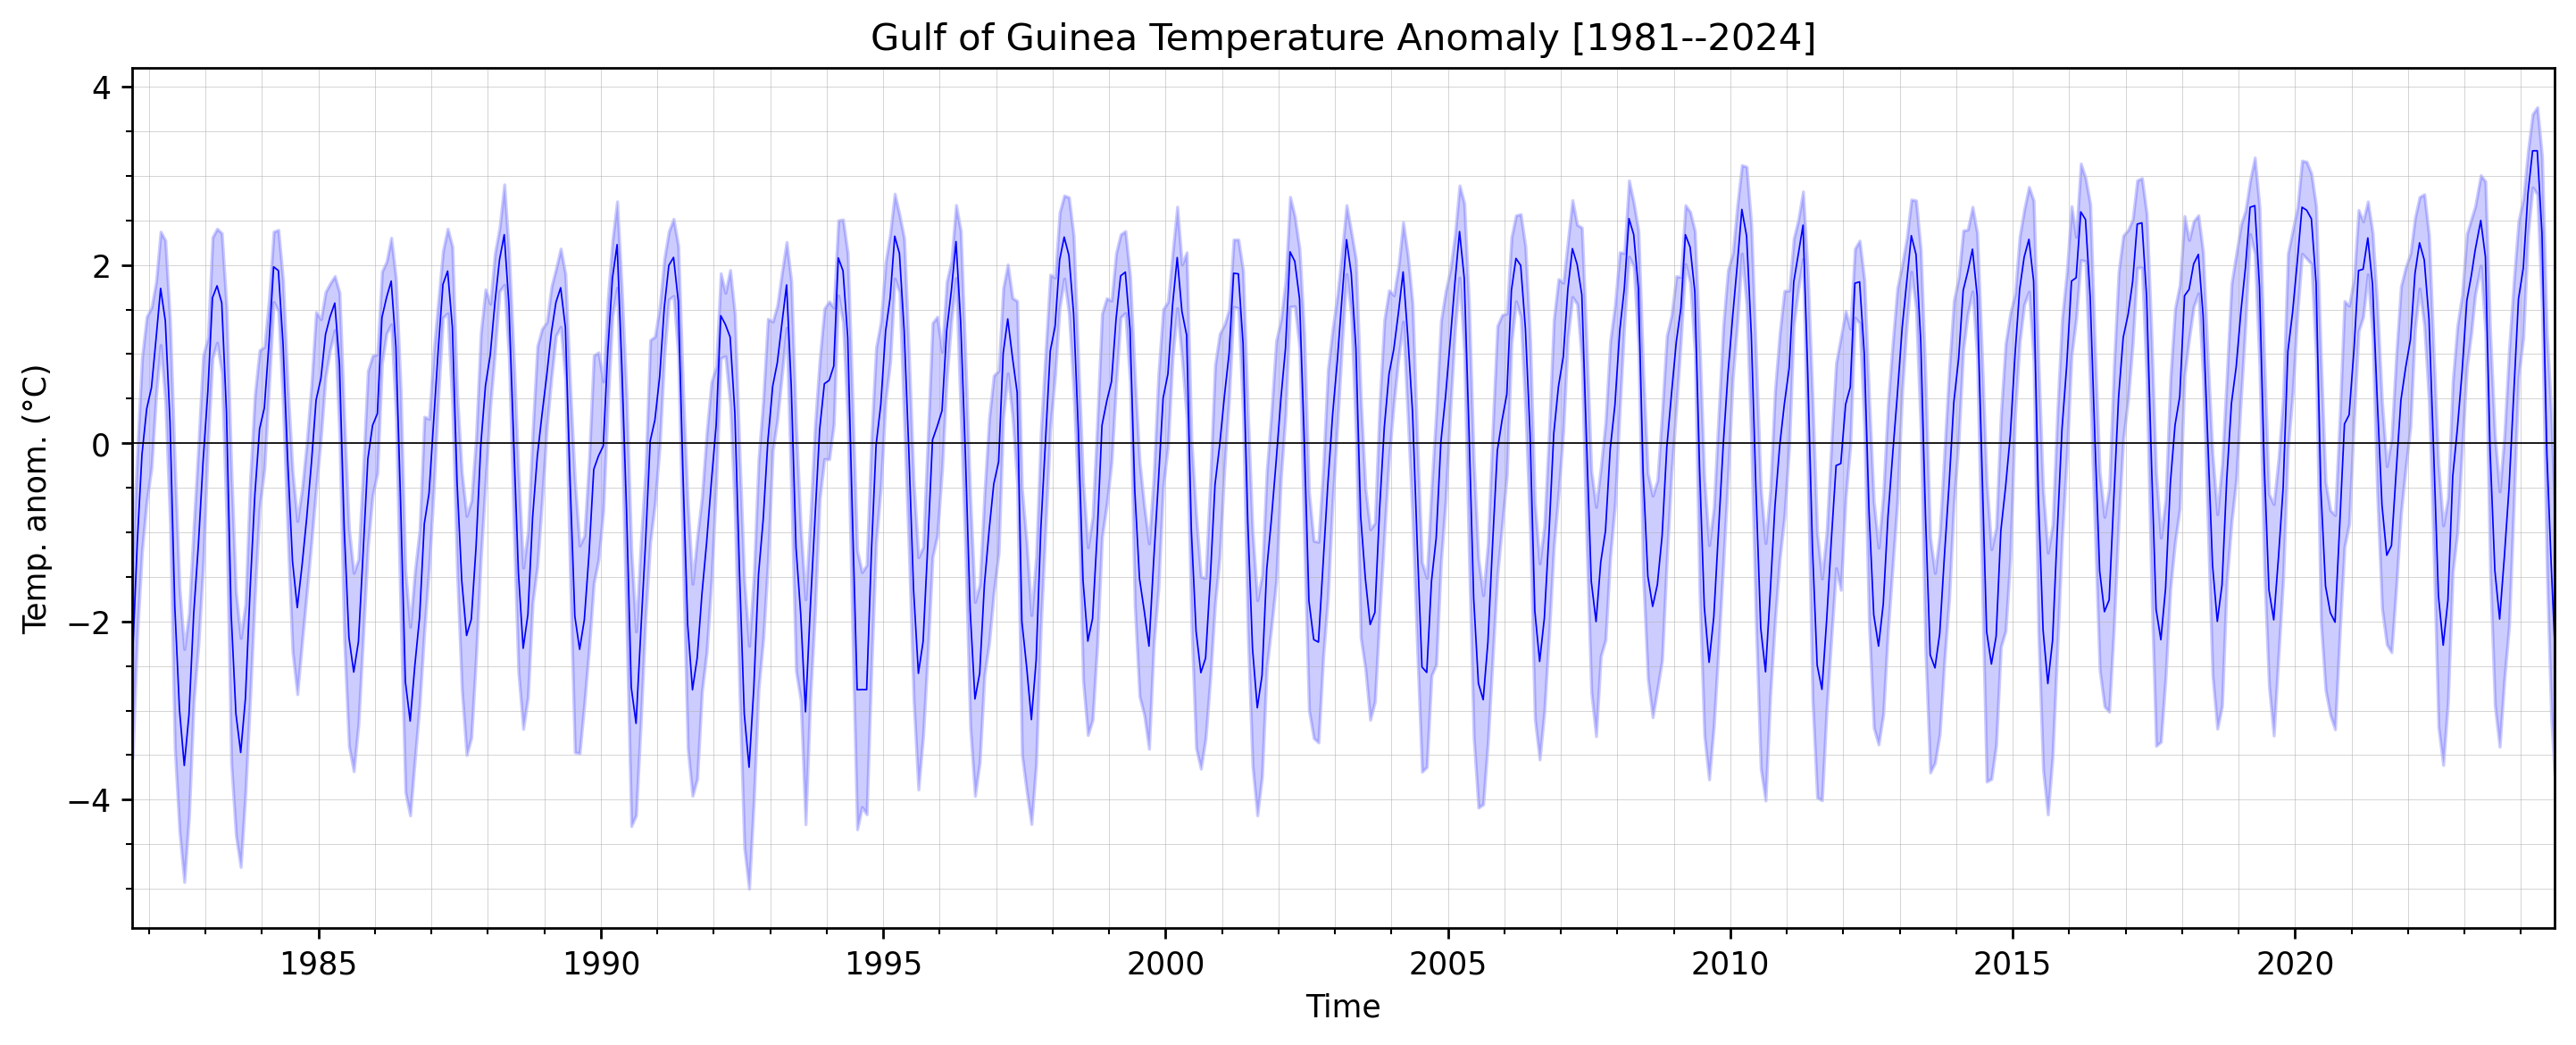

In [ ]:
#%% anomalie + std
directory = "../sst_data/"
file_m = "year_monthmean_sst_gg_1981_2024.nc"
file_s = "year_monthstd_sst_gg_1981_2024.nc"

netc = xr.open_dataset(directory+file_m, decode_times=True)
sst   = netc.analysed_sst - 273.15

sst_spatial_mean = np.nanmean(sst, axis=(1,2))
sst_spatial_std  = np.nanstd(sst, axis=(1,2))
global_mean = np.nanmean(sst, axis=(0,1,2))

anom = sst_spatial_mean - global_mean

ds = xr.open_dataset(directory+file_m, decode_times=True)
temps = ds['time'][:]

#%% plot

fig = plt.figure(figsize=(14,5),dpi=250)
ax = plt.gca()

plt.plot(temps, anom, 'b',linewidth=.5)
plt.fill_between(temps, anom-sst_spatial_std, anom+sst_spatial_std, alpha=0.2, color='b')
plt.xlabel("Time")
plt.ylabel("Temp. anom. (°C)")
plt.title("Gulf of Guinea Temperature Anomaly [1981--2024]")
plt.hlines(y=0, xmin=temps[0], xmax=temps[-1:], color='k',linewidth=.5)
ax.set_xlim(xmin=temps[0], xmax=temps[-1:])

ax.xaxis.set_minor_locator(mdates.YearLocator())
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))  # Minor tick every 0.5 units
plt.grid(linewidth=.15, which='both',axis='both')

plt.savefig(directory+'anomalie_sst_GG.png', dpi=fig.dpi, bbox_inches='tight')
plt.show()
